# Premier réseau de convolution (LeNet)

In [1]:
# Append module location to sys.path
import sys, pathlib, os
pkg_path = pathlib.Path().cwd().parent
sys.path.append(pkg_path.as_posix())
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation, MaxPool2D
from keras.utils.image_dataset import image_dataset_from_directory, dataset_utils, ALLOWLIST_FORMATS

In [3]:
DATA_DIR = pathlib.Path.home() / 'yawbcc_data'

# Dans le répertoire barcelona, supprimer le fichier PBC_dataset_normal_DIB.zip et neutrophil/.DS_169665.jpg
train_ds, valid_ds = image_dataset_from_directory(DATA_DIR / 'barcelona', validation_split=0.2, subset='both', 
                                                  image_size=(28, 28), batch_size=128, crop_to_aspect_ratio=True,
                                                  seed=2022)

# Pour passer à 13 classes, sans toucher l'arborescence, utilisez le code ci-dessous à la place
# image_paths, _, _ = dataset_utils.index_directory('/home/damien/yawbcc_data/barcelona', None, formats=ALLOWLIST_FORMATS)
# labels = [pathlib.Path(pth).name.split('_')[0] for pth in image_paths]
# labels, classes = pd.factorize(labels)
# train_ds, valid_ds = image_dataset_from_directory(DATA_DIR / 'barcelona', list(labels), validation_split=0.2, subset='both', 
#                                                   image_size=(28, 28), batch_size=100, crop_to_aspect_ratio=True, shuffle=False)


Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Using 3418 files for validation.


In [4]:
# LeNet: source https://en.wikipedia.org/wiki/LeNet
model = Sequential(name="LeNet")
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='sigmoid', input_shape=(28, 28, 3)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(13, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120 

In [5]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=20)

Epoch 1/20
107/107 [==============================] - 3s 25ms/step - loss: 2.0867 - accuracy: 0.1837 - val_loss: 2.0109 - val_accuracy: 0.1908
Epoch 2/20
107/107 [==============================] - 3s 24ms/step - loss: 2.0074 - accuracy: 0.1996 - val_loss: 1.9516 - val_accuracy: 0.3098
Epoch 3/20
107/107 [==============================] - 3s 24ms/step - loss: 1.6082 - accuracy: 0.4117 - val_loss: 1.3485 - val_accuracy: 0.4988
Epoch 4/20
107/107 [==============================] - 3s 24ms/step - loss: 1.3051 - accuracy: 0.4944 - val_loss: 1.2984 - val_accuracy: 0.5059
Epoch 5/20
107/107 [==============================] - 3s 24ms/step - loss: 1.2280 - accuracy: 0.5268 - val_loss: 1.2489 - val_accuracy: 0.5155
Epoch 6/20
107/107 [==============================] - 3s 25ms/step - loss: 1.1973 - accuracy: 0.5344 - val_loss: 1.1816 - val_accuracy: 0.5345
Epoch 7/20
107/107 [==============================] - 3s 26ms/step - loss: 1.1721 - accuracy: 0.5436 - val_loss: 1.1678 - val_accuracy: 0.5351

<AxesSubplot: >

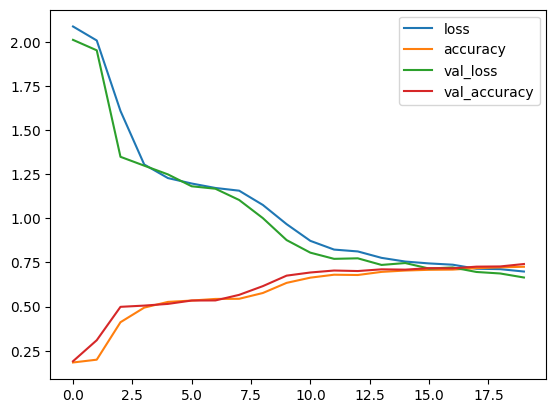

In [6]:
pd.DataFrame(history.history).plot()